# 1. Setup

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [53]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**  
- `total_bedrooms` has 207 null values, which is approximately 1% of the data. So, we can just drop them.

In [56]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

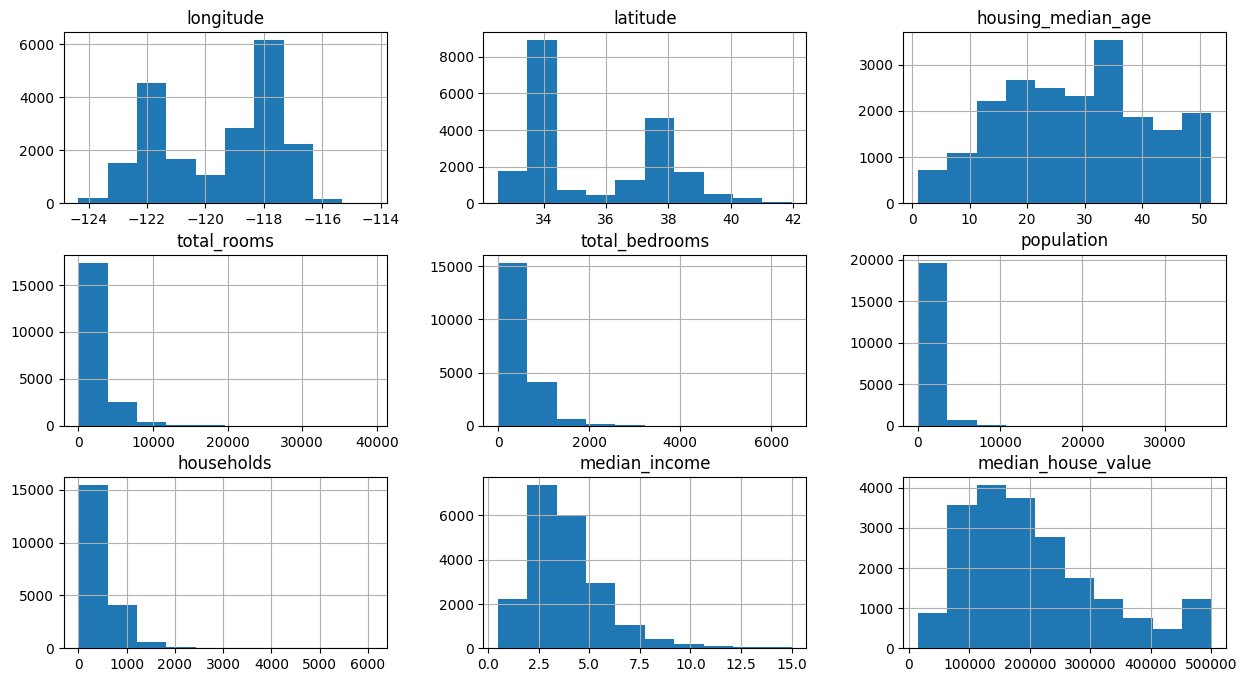

In [57]:
data.hist(figsize=(15,8))

**Observation:**  
- Most histograms are right screwed

<Axes: >

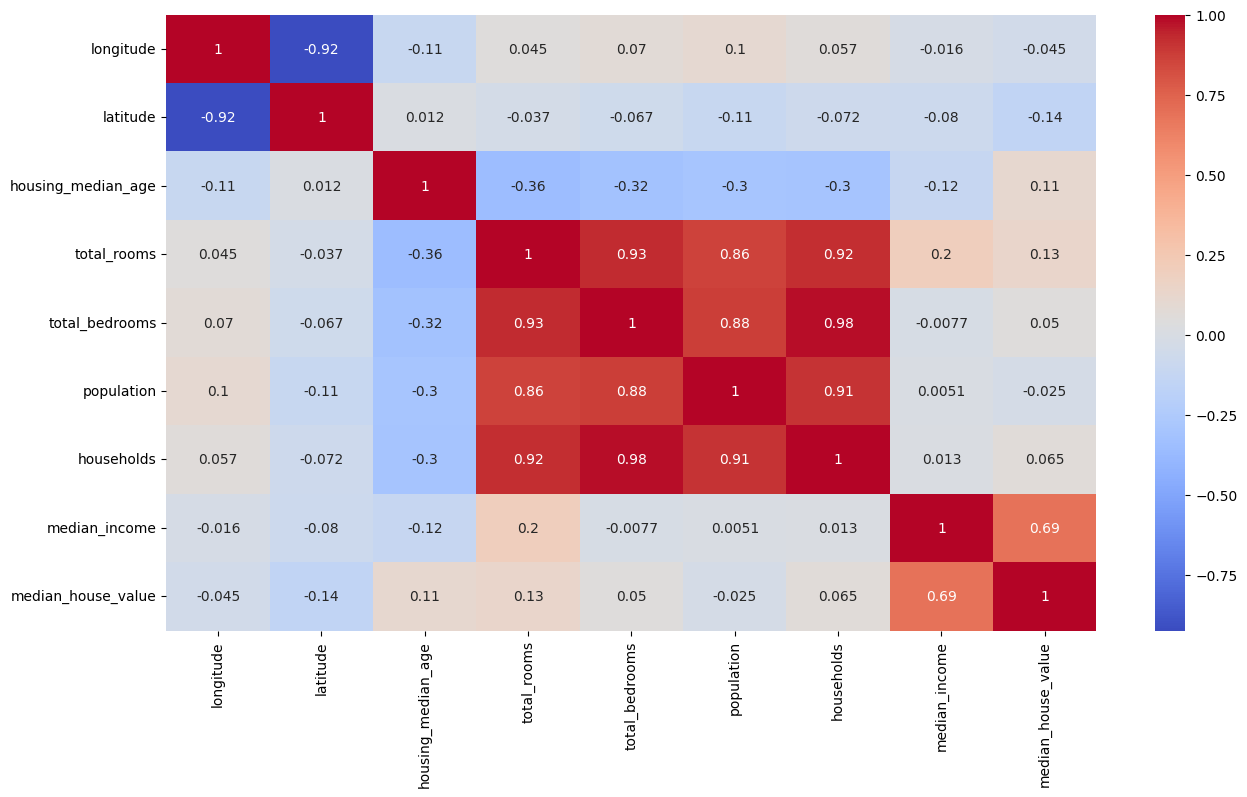

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

**Observation:**  
- `median_income` and the target `median_house_value` have a strong correlation.

# 4. Data Preprocessing

In [60]:
# Train Test Validation split
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
train_data = X_train.join(y_train)

In [ ]:
train_data.dropna(inplace=True)
train_data.info()

In [62]:
# log normal tranformation for the right sckewed columns
train_data['log_total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['log_total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['log_population'] = np.log1p(train_data['population'])
train_data['log_households'] = np.log1p(train_data['households'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'log_total_rooms'}>],
       [<Axes: title={'center': 'log_total_bedrooms'}>,
        <Axes: title={'center': 'log_population'}>,
        <Axes: title={'center': 'log_households'}>]], dtype=object)

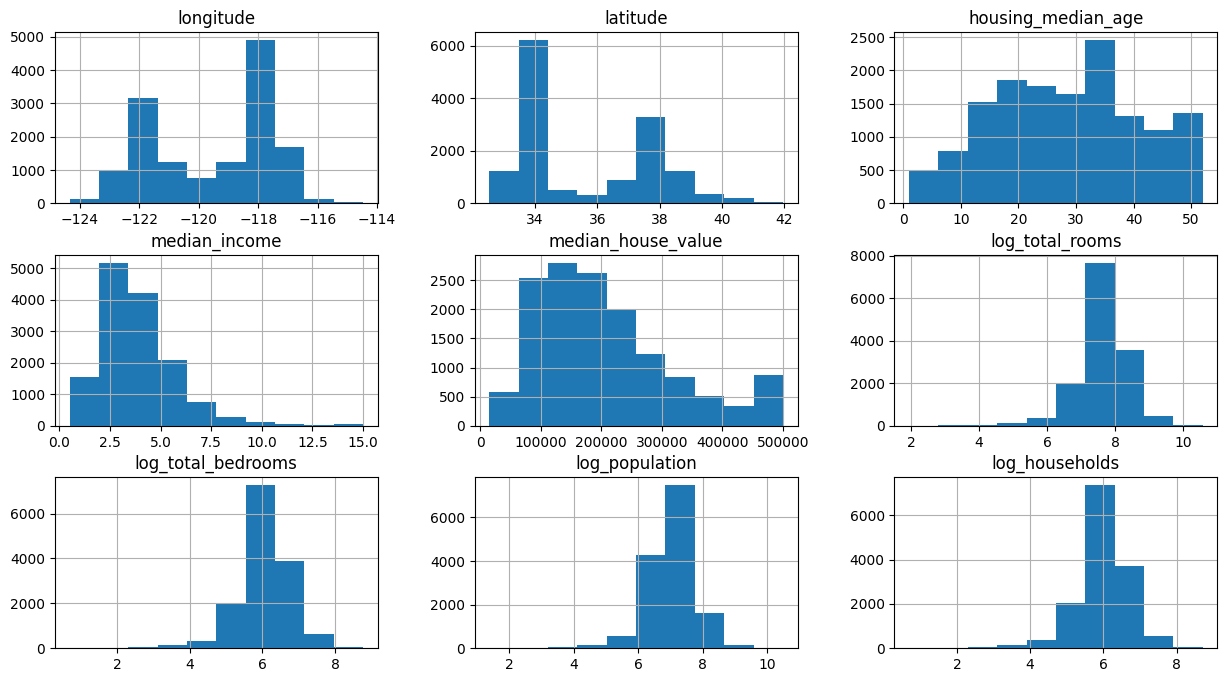

In [63]:
train_data.drop(['total_rooms','total_bedrooms', 'population','households'], axis=1, inplace=True)
train_data.hist(figsize=(15,8))

In [64]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6373
INLAND        4477
NEAR OCEAN    1834
NEAR BAY      1617
ISLAND           2
Name: count, dtype: int64

In [65]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int))

train_data = train_data.drop('ocean_proximity', axis=1)

train_data

,longitude,latitude,housing_median_age,median_income,median_house_value,log_total_rooms,log_total_bedrooms,log_population,log_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,-120.96,37.61,23.0,1.9444,93400.0,8.159947,6.788972,7.811163,6.705639,0,1,0,0,0
7292,-118.22,33.98,34.0,1.6685,128800.0,7.707962,6.625392,8.000014,6.602588,1,0,0,0,0
17618,-121.94,37.28,27.0,5.0822,327500.0,7.958577,6.142037,7.043160,6.066108,1,0,0,0,0
17518,-121.91,37.34,35.0,2.8042,240900.0,7.691657,6.410175,7.085064,6.333280,1,0,0,0,0
5172,-118.28,33.95,41.0,1.4103,86200.0,6.728629,5.342334,6.562444,5.262690,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,5.4286,273400.0,8.003697,6.216606,7.271009,6.118097,1,0,0,0,0
12081,-117.54,33.76,5.0,4.7965,160800.0,8.673684,6.943122,8.089176,6.909753,1,0,0,0,0
5447,-118.42,34.01,42.0,3.0990,335400.0,7.374629,5.913503,6.859615,5.894403,1,0,0,0,0
866,-122.04,37.57,12.0,5.2879,231200.0,8.651724,6.970730,8.142354,6.964136,0,0,0,1,0


<Axes: >

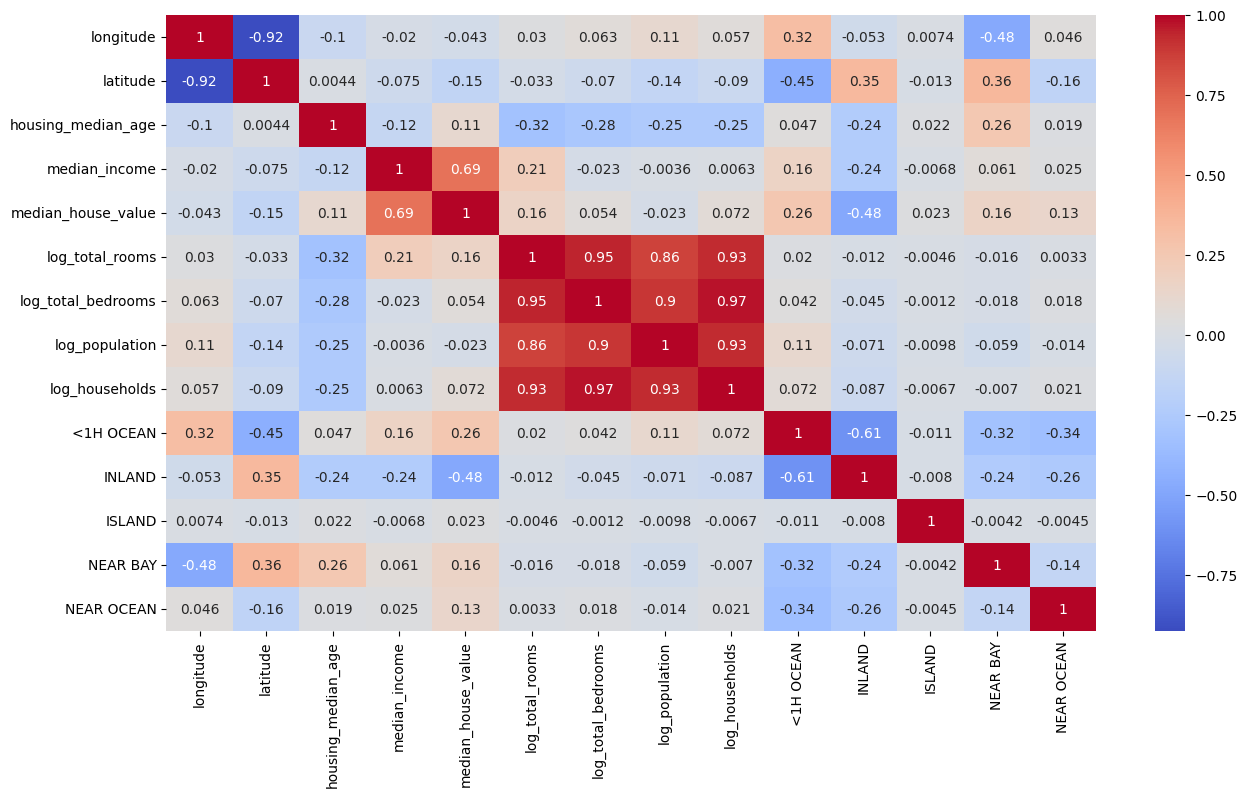

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

**Observation:**  
- Now we can see that `<1H Ocean` has high correlation and `inland` has negative correlation with `median_house_value`

<Axes: xlabel='latitude', ylabel='longitude'>

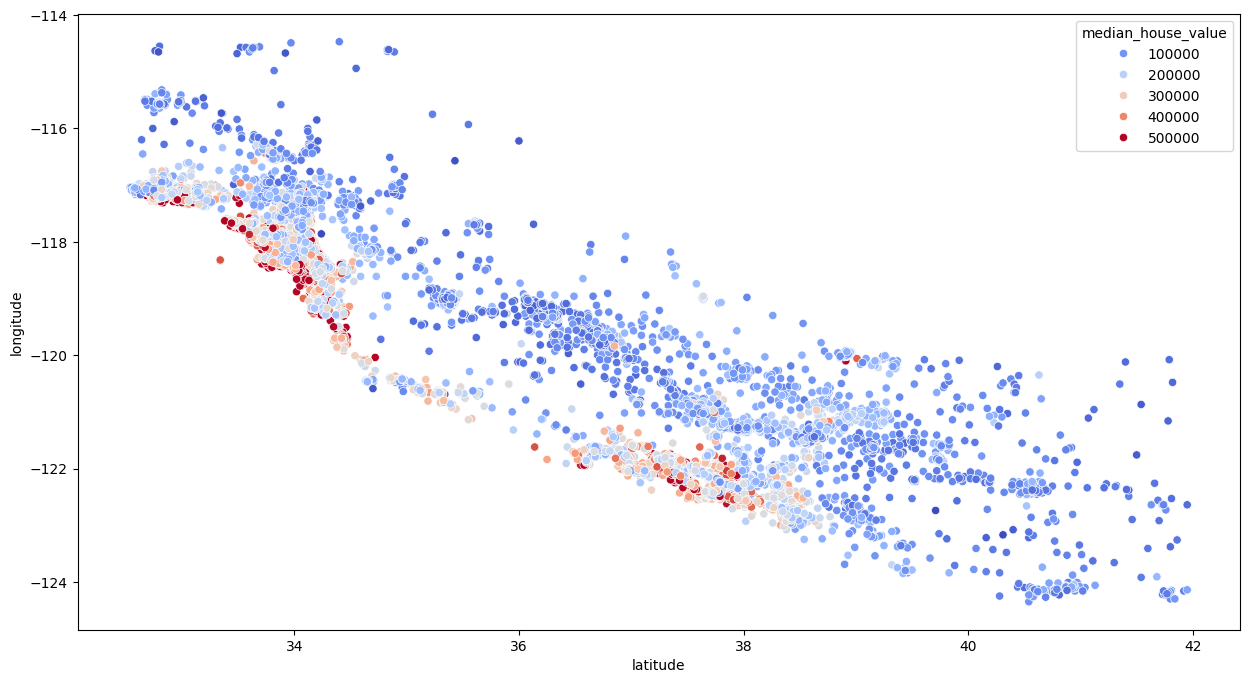

In [67]:
# Since we have the latitue and longitude lets visualize the the speadout
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

# 5.1 Feature Engineering

In [84]:
train_data['rooms_per_household'] = train_data['log_total_rooms']/train_data['log_households']
train_data['bedroom_ratio'] = train_data['log_total_rooms']/train_data['log_total_bedrooms']
train_data['population_per_household'] = train_data['log_population'] / train_data['log_households']

# 5.2 Feature Scaling (z-score transformation)

In [85]:
# Function definition z-score 

def z_scaling (data):
    scaled_data = pd.DataFrame()

    for j in data.columns:
        mean = data[j].mean()
        std_dev = data[j].std()

        scaled_data[j] = (data[j] - mean) / std_dev 
    
    return scaled_data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'log_total_rooms'}>,
        <Axes: title={'center': 'log_total_bedrooms'}>,
        <Axes: title={'center': 'log_population'}>],
       [<Axes: title={'center': 'log_households'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'population_per_household'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

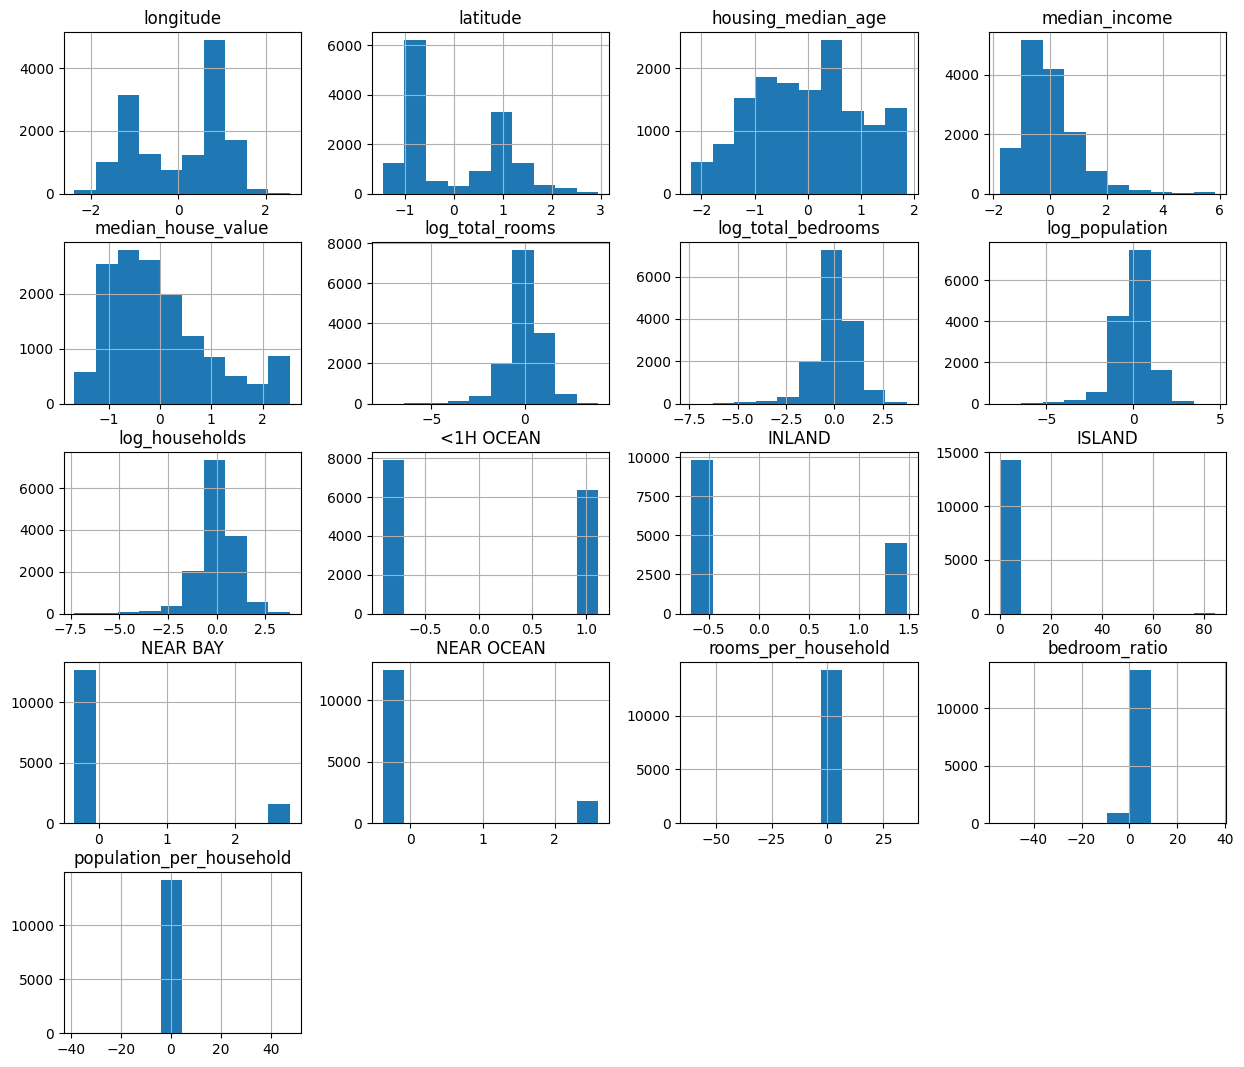

In [86]:
train_data = z_scaling(train_data)
train_data.hist(figsize=(15,13))

# 6. Linear Regression